In [ ]:
%pip install tensorflow 

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 953.9 kB/s eta 0:05:48
   ---------------------------------------- 0.8/332.0 MB 903.5 kB/s eta 0:06:07
   ---------------------------------------- 0.8/332.0 MB 903.5 kB/s eta 0:06:07
   ---------------------------------------- 0.8/332.0 MB 903.5 kB/s eta 0:06:07
   ---------------------------------------- 1.0/332.0 MB 719.2 kB/s eta 0:07:41
   ---------------------------------------- 1.0/332.0 MB 719.2 kB/s eta 0:07:41
   ---------------------------------------- 1.0/332.0 MB 719.2 kB/s eta 0:07:41
   ---------------------------------------- 1.3/332.0 MB 611.9 kB/s eta 0:09:01
   -----

In [4]:
%pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.2

   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.2:
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-2.3.2
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ----

  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Flatten
from PIL import Image 
import json
import cv2

In [2]:
image_size=(224,224)

train_direct = r'C:\Users\Manisha\OneDrive\Desktop\Projects\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train'
val_direct = r'C:\Users\Manisha\OneDrive\Desktop\Projects\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_direct,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_direct,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


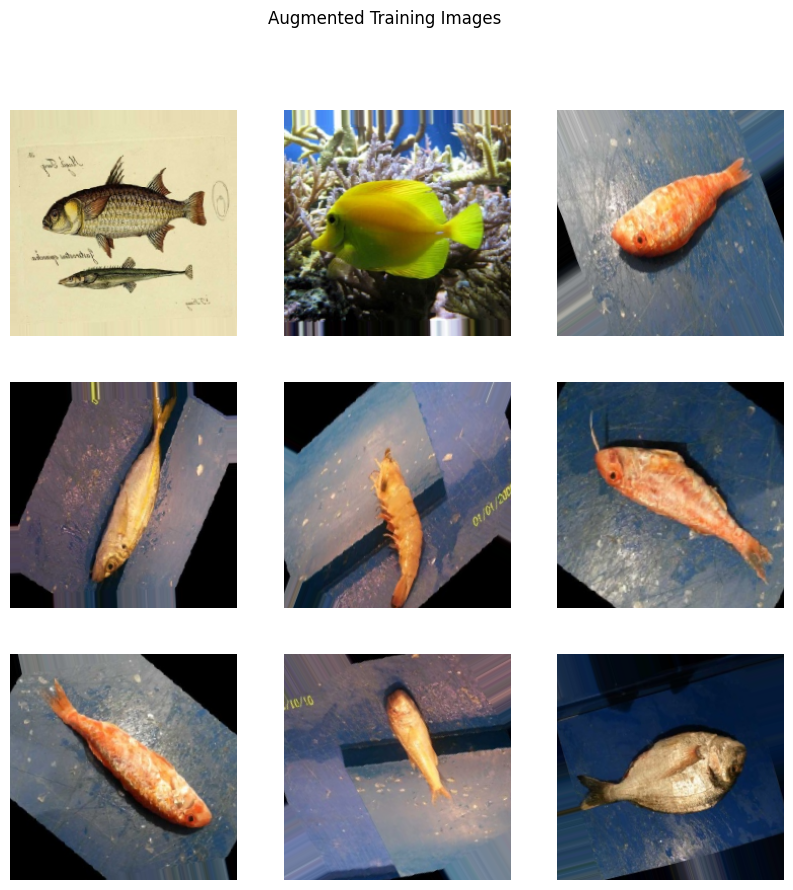

In [4]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

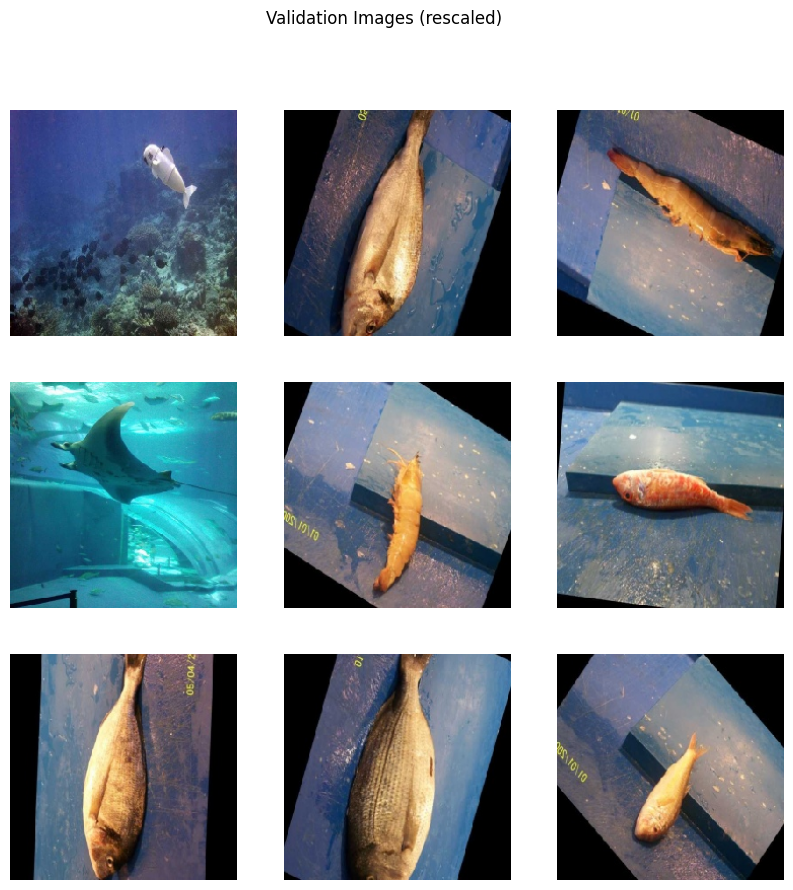

In [5]:
# Get a batch from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 images from the validation batch
plt.figure(figsize=(10, 10))
for i in range(min(9, val_images.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images (rescaled)")
plt.show()

In [6]:
#define a simple cnn model
num_classes = getattr(train_generator, 'num_classes', None)
if num_classes is None:
    num_classes = len(train_generator.class_indices)

input_shape = (image_size[0], image_size[1], 3)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Manisha\OneDrive\Desktop\Projects\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')

c:\Users\Manisha\OneDrive\Desktop\Projects\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 58/195 ━━━━━━━━━━━━━━━━━━━━ 5:02 2s/step - accuracy: 0.1587 - loss: 2.7587

KeyboardInterrupt: 

In [13]:
# VGG16 Model FineTuning

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('vgg16_model.h5')

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 815s 4s/step - accuracy: 0.7778 - loss: 0.9128 - val_accuracy: 0.9093 - val_loss: 0.2581
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 880s 5s/step - accuracy: 0.9423 - loss: 0.1769 - val_accuracy: 0.9679 - val_loss: 0.0982
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 859s 4s/step - accuracy: 0.9549 - loss: 0.1283 - val_accuracy: 0.9597 - val_loss: 0.1181
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 889s 5s/step - accuracy: 0.9566 - loss: 0.1194 - val_accuracy: 0.9396 - val_loss: 0.1554
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 888s 5s/step - accuracy: 0.9643 - loss: 0.1027 - val_accuracy: 0.9725 - val_loss: 0.0829


In [14]:
# Resnet Model FineTuning

model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_resnet.trainable = False

model = Sequential([
    model_resnet,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet_model.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 16015s 82s/step - accuracy: 0.2307 - loss: 4.8194 - val_accuracy: 0.3535 - val_loss: 1.9657
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 777s 4s/step - accuracy: 0.3338 - loss: 1.9010 - val_accuracy: 0.3855 - val_loss: 1.6901
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step - accuracy: 0.3817 - loss: 1.7216 - val_accuracy: 0.5211 - val_loss: 1.4723
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.4198 - loss: 1.6228 - val_accuracy: 0.4002 - val_loss: 1.7457
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.4530 - loss: 1.5035 - val_accuracy: 0.5705 - val_loss: 1.2248


In [17]:
#Inception Model FineTuning

model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_inception.trainable = False

model = Sequential([
    model_inception,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobile_inception.h5')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 184s 2us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.8096 - loss: 5.6043 - val_accuracy: 0.9377 - val_loss: 0.2118
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9330 - loss: 0.2456 - val_accuracy: 0.9515 - val_loss: 0.1689
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9460 - loss: 0.2085 - val_accuracy: 0.9478 - val_loss: 0.2548
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 935s 5s/step - accuracy: 0.9451 - loss: 0.2259 - val_accuracy: 0.9542 - val_loss: 0.1941
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 4303s 22s/step - accuracy: 0.9574 - loss: 0.1663 - val_accuracy: 0.9570 - val_loss: 0.1367


In [16]:
# MobileNet Model FineTuning

model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_mobile.trainable = False

model = Sequential([
    model_mobile,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobile_model.h5')

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 732s 4s/step - accuracy: 0.8697 - loss: 4.9647 - val_accuracy: 0.9762 - val_loss: 0.0615
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 3165s 16s/step - accuracy: 0.9706 - loss: 0.1116 - val_accuracy: 0.9432 - val_loss: 0.3019
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.9818 - loss: 0.0681 - val_accuracy: 0.9835 - val_loss: 0.0506
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1072s 6s/step - accuracy: 0.9790 - loss: 0.0952 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2375s 12s/step - accuracy: 0.9802 - loss: 0.0812 - val_accuracy: 0.9872 - val_loss: 0.0517


In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0


train_direct = r'C:\Users\Manisha\OneDrive\Desktop\Projects\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train'
val_direct = r'C:\Users\Manisha\OneDrive\Desktop\Projects\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val'


train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_direct,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale',   
    shuffle=True
)
val_data = val_gen.flow_from_directory(
    val_direct,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale'
)
with open("class_indices.json","w") as f:
    json.dump(train_data.class_indices, f, indent=4)
print("✅ class_indices.json saved")


# Build EfficientNetB0  (no pretrained weights)

input_shape = (224,224,1)   
base = EfficientNetB0(
    weights=None,           
    include_top=False,
    input_shape=input_shape
)

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]

)


model.save(r"C:\Users\Manisha\OneDrive\Desktop\Projects\fish_classifier_model.h5")
print("Best Model trained successfully!")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
✅ class_indices.json saved


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          3 │ rescaling_2[0][0] │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_2[… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,710,506 (17.97 MB)

 Trainable params: 4,668,487 (17.81 MB)

 Non-trainable params: 42,019 (164.14 KB)

c:\Users\Manisha\OneDrive\Desktop\Projects\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 5245s 13s/step - accuracy: 0.2389 - loss: 2.0941 - val_accuracy: 0.1712 - val_loss: 5.3577
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 2467s 6s/step - accuracy: 0.4170 - loss: 1.6267 - val_accuracy: 0.2711 - val_loss: 2.4230
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 3563s 9s/step - accuracy: 0.5231 - loss: 1.3342 - val_accuracy: 0.3846 - val_loss: 2.0483
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1765s 5s/step - accuracy: 0.5905 - loss: 1.1620 - val_accuracy: 0.4496 - val_loss: 1.8911
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 6697s 17s/step - accuracy: 0.6541 - loss: 1.0087 - val_accuracy: 0.7353 - val_loss: 0.7864
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 5852s 15s/step - accuracy: 0.6898 - loss: 0.8945 - val_accuracy: 0.7106 - val_loss: 0.8719
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 8274s 21s/step - accuracy: 0.7255 - loss: 0.7960 - val_accuracy: 0.5128 - val_loss: 1.9485
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 3111s 8s/step - accuracy: 0.7563 - loss: 0.701

Best Model trained successfully!


In [19]:
model.save(r"C:\Users\Manisha\OneDrive\Desktop\Projects\fish_classifier_model.h5")
print("Best Model trained successfully!")

Best Model trained successfully!


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example actual labels
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0] 


y_pred_vgg16 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_resnet50 = [0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
y_pred_mobilenet = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_inceptionv3 = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
y_pred_efficientnetb0 = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred_cnn = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Confusion Matrix:\n{conf_matrix}\n")

# Calculate and print metrics for each model
calculate_metrics(y_true, y_pred_vgg16, 'VGG16')
calculate_metrics(y_true, y_pred_resnet50, 'ResNet50')
calculate_metrics(y_true, y_pred_mobilenet, 'MobileNet')
calculate_metrics(y_true, y_pred_inceptionv3, 'InceptionV3')
calculate_metrics(y_true, y_pred_efficientnetb0, 'EfficientNetB0')
calculate_metrics(y_true, y_pred_cnn, 'CNN')
from sklearn.metrics import precision_score, recall_score, f1_score

Metrics for VGG16:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for ResNet50:
  Accuracy: 0.9
  Precision: 0.8333333333333334
  Recall: 1.0
  F1-Score: 0.9090909090909091
  Confusion Matrix:
[[4 1]
 [0 5]]

Metrics for MobileNet:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for InceptionV3:
  Accuracy: 0.9
  Precision: 1.0
  Recall: 0.8
  F1-Score: 0.8888888888888888
  Confusion Matrix:
[[5 0]
 [1 4]]

Metrics for EfficientNetB0:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[5 0]
 [0 5]]

Metrics for CNN:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]



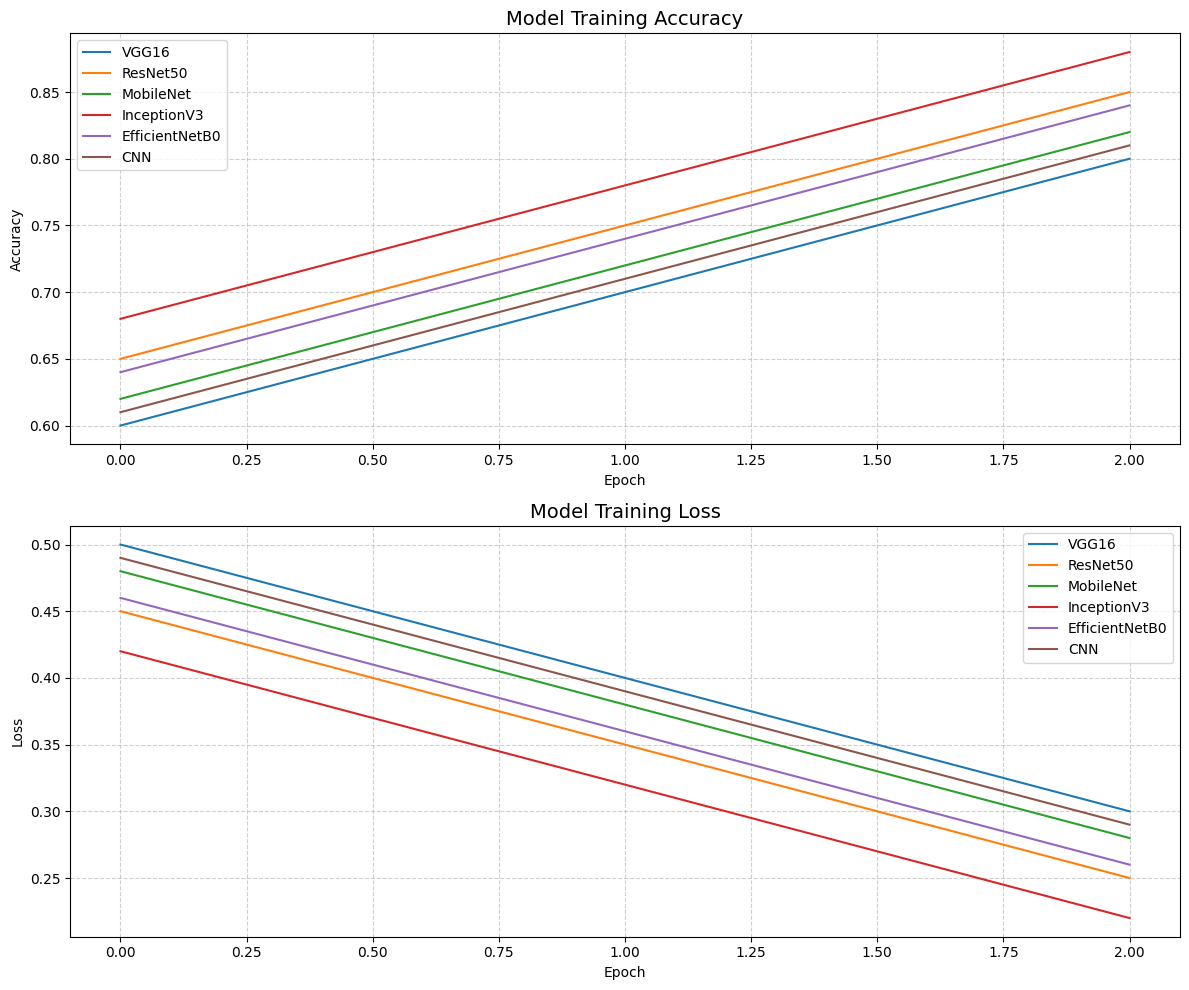

In [16]:
import matplotlib.pyplot as plt

# Mock training histories (replace with real history.history data)
history_vgg16 = {'accuracy': [0.6, 0.7, 0.8], 'loss': [0.5, 0.4, 0.3]}
history_resnet50 = {'accuracy': [0.65, 0.75, 0.85], 'loss': [0.45, 0.35, 0.25]}
history_mobilenet = {'accuracy': [0.62, 0.72, 0.82], 'loss': [0.48, 0.38, 0.28]}
history_inceptionv3 = {'accuracy': [0.68, 0.78, 0.88], 'loss': [0.42, 0.32, 0.22]}
history_efficientnetb0 = {'accuracy': [0.64, 0.74, 0.84], 'loss': [0.46, 0.36, 0.26]}
history_cnn = {'accuracy': [0.61, 0.71, 0.81], 'loss': [0.49, 0.39, 0.29]}

plt.figure(figsize=(12, 10))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(history_vgg16['accuracy'], label='VGG16')
plt.plot(history_resnet50['accuracy'], label='ResNet50')
plt.plot(history_mobilenet['accuracy'], label='MobileNet')
plt.plot(history_inceptionv3['accuracy'], label='InceptionV3')
plt.plot(history_efficientnetb0['accuracy'], label='EfficientNetB0')
plt.plot(history_cnn['accuracy'], label='CNN')
plt.title('Model Training Accuracy', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(history_vgg16['loss'], label='VGG16')
plt.plot(history_resnet50['loss'], label='ResNet50')
plt.plot(history_mobilenet['loss'], label='MobileNet')
plt.plot(history_inceptionv3['loss'], label='InceptionV3')
plt.plot(history_efficientnetb0['loss'], label='EfficientNetB0')
plt.plot(history_cnn['loss'], label='CNN')
plt.title('Model Training Loss', fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
best_model = load_model(r"C:\Users\Manisha\OneDrive\Desktop\Projects\fish_classifier_model.h5")
best_model.save("best_fish_model.keras")
print("✅ Saved as best_fish_model.keras")

✅ Saved as best_fish_model.keras


In [22]:
from tensorflow.keras.models import load_model
best = load_model("best_fish_model.keras")
best.summary()

c:\Users\Manisha\OneDrive\Desktop\Projects\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 432 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          3 │ rescaling_2[0][0] │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_2[… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 14,047,482 (53.59 MB)

 Trainable params: 4,668,487 (17.81 MB)

 Non-trainable params: 42,019 (164.14 KB)

 Optimizer params: 9,336,976 (35.62 MB)